In [ ]:
# 초기 1회 실행
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# 📥 데이터 다운로드 (Download Dataset)
# GitHub에서 csv 파일을 다운로드합니다.

!wget https://raw.githubusercontent.com/Dropthe-bit/ai_portfolio/main/data/diabetes_trainR.csv
!wget https://raw.githubusercontent.com/Dropthe-bit/ai_portfolio/main/data/diabetes_testR.csv

--2025-06-24 06:32:29--  https://raw.githubusercontent.com/Dropthe-bit/ai_portfolio/main/data/diabetes_trainR.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 61855 (60K) [text/plain]
Saving to: ‘diabetes_trainR.csv.2’

diabetes_trainR.csv 100%[===================>]  60.41K  --.-KB/s    in 0.01s   

2025-06-24 06:32:29 (4.01 MB/s) - ‘diabetes_trainR.csv.2’ saved [61855/61855]

--2025-06-24 06:32:29--  https://raw.githubusercontent.com/Dropthe-bit/ai_portfolio/main/data/diabetes_testR.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK


# Penalized Model

In [ ]:
## 필요 패키지 설치 및 import
import importlib.util
import subprocess
import sys
def install_and_import(packages):
    for pkg in packages:
        package = pkg
        try:
            importlib.util.find_spec(package)
            print(f"{package} is already installed.")
        except ImportError:
            # 모듈이 설치되어 있지 않은 경우 설치시도
            print(f"{package} is not installed. Installing...")
            subprocess.check_call([sys.executable, "-m", "pip", "install", package])
            subprocess.check_call(["conda", "install", package, "-y"])

            # 설치 후 다시 임포트를 시도
            importlib.import_module(package)
            print(f"{package} has been successfully installed.")

        # finally:
        #     globals()[package] = importlib.import_module(package)
        except Exception as e:
            # 설치 중 예외가 발생한 경우, 에러 메시지를 출력
            print(f"An error occurred while installing {package}: {str(e)}")

# 예시 사용법
install_and_import(['mlxtend'])


mlxtend is already installed.


In [ ]:
## 필요 모듈 임포트
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression


# from statsmodels.stats.outliers_influence import variance_inflation_factor
# from statsmodels.tools.tools import add_constant
# from sklearn.preprocessing import StandardScaler
# from mlxtend.feature_selection import SequentialFeatureSelector as SFS
# from sklearn.inspection import permutation_importance
# from sklearn.metrics import mean_squared_error
# from scipy.stats import probplot
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


# 데이터 읽기

In [ ]:
rd = pd.read_csv('diabetes_trainR.csv')
rd

,x.age,x.sex,x.bmi,x.map,x.tc,x.ldl,x.hdl,x.tch,x.ltg,x.glu,y
0,-0.092695,-0.044642,0.028284,-0.015999,0.036958,0.024991,0.056003,-0.039493,-0.005145,-0.001078,302
1,-0.081798,-0.044642,-0.081653,-0.040099,0.002559,-0.018537,0.070730,-0.039493,-0.010904,-0.092204,51
2,-0.045472,-0.044642,-0.038540,-0.026328,-0.015328,0.000878,-0.032356,-0.002592,0.001144,-0.038357,93
3,0.048974,0.050680,0.058463,0.070073,0.013567,0.020607,-0.021311,0.034309,0.022004,0.027917,275
4,0.110727,0.050680,0.006728,0.028758,-0.027712,-0.007264,-0.047082,0.034309,0.002008,0.077622,277
...,...,...,...,...,...,...,...,...,...,...,...
304,-0.030942,0.050680,0.028284,0.070073,-0.126781,-0.106845,-0.054446,-0.047981,-0.030751,0.015491,170
305,-0.052738,-0.044642,0.054152,-0.026328,-0.055231,-0.033881,-0.013948,-0.039493,-0.074089,-0.059067,142
306,0.041708,0.050680,0.012117,0.039087,0.054845,0.044406,0.004460,-0.002592,0.045601,-0.001078,235
307,-0.023677,-0.044642,-0.065486,-0.081414,-0.038720,-0.053610,0.059685,-0.076395,-0.037128,-0.042499,59


# 벌점회귀 모형

## 종속 변수 및 독립변수 설정

In [ ]:
## 종속 변수와 독립 변수 설정
train = rd
X_train = train.drop(columns=['y'])
y_train = train['y']

## 표준화 적용
- 릿지(Ridge)와 라쏘(Lasso) 회귀 모형을 적용할 시 표준화를 하는 것이 일반적
  - 규제 효과: 변수 크기 차이로 인한 비일관적인 페널티 적용을 방지
  - 스케일링 문제: 변수들의 다른 척도(크기)로 인해 특정 변수가 과도하게 영향을 미치는 것을 방지
  - 해석 용이성: 표준화된 변수를 사용하면 가중치를 비교하고 해석하기 좋음
- 표준화 방법:
  - 각 변수에서 평균을 빼고 표준편차로 나누어 z-score로 변환
  - 이때 유의할 점은, **모형에 적합한(학습한) 데이터에 대한 𝜇, 𝜎 값을 저장해놨다가, 새로운 데이터에 동일하게 적용**해야 함

  - 표준화된 값= \(𝑋 − 𝜇)/𝜎
  - 𝑋 는 원래 변수 값, 𝜇는 변수의 평균, 𝜎는 변수의 표준편차

In [ ]:
## 데이터 스케일링
scaler = StandardScaler() #
X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test) # 새로운 데이터가 들어오면 동일하게 적용

### 기본 모델

In [ ]:
model_raw = LinearRegression()
model_raw.fit(X = X_train_scaled, # 독립변수
              y = y_train) # 종속 변수

print('R2:', model_raw.score(X_train_scaled, y_train)) ## R2값

## 적합 모형 수정 R^2 값 확인
def adjusted_r2(model, X, y):
    r2 = model.score(X, y)
    n = X.shape[0]
    p = X.shape[1]
    adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
    return adj_r2

adj_r2_raw = adjusted_r2(model_raw, X_train_scaled, y_train) ## adj R2 값
print('adj R2:', adj_r2_raw)




R2: 0.524141196332746
adj R2: 0.5081727801023013


In [ ]:
## 평가 함수 정의
def evaluate_model(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    return mse, mae, r2, mape

## 적합 모형 수정 R^2 값 확인
def adjusted_r2(model, X, y):
    r2 = model.score(X, y)
    n = X.shape[0]
    p = X.shape[1]
    adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
    return adj_r2



## Ridge

### 리지 회귀 모델의 최적 람다 결정


In [ ]:
## 리지 회귀 모델의 최적 람다 결정
ridge_params = {'alpha': np.logspace(-5, 5, 50)}
ridge_params

{'alpha': array([1.00000000e-05, 1.59985872e-05, 2.55954792e-05, 4.09491506e-05,
        6.55128557e-05, 1.04811313e-04, 1.67683294e-04, 2.68269580e-04,
        4.29193426e-04, 6.86648845e-04, 1.09854114e-03, 1.75751062e-03,
        2.81176870e-03, 4.49843267e-03, 7.19685673e-03, 1.15139540e-02,
        1.84206997e-02, 2.94705170e-02, 4.71486636e-02, 7.54312006e-02,
        1.20679264e-01, 1.93069773e-01, 3.08884360e-01, 4.94171336e-01,
        7.90604321e-01, 1.26485522e+00, 2.02358965e+00, 3.23745754e+00,
        5.17947468e+00, 8.28642773e+00, 1.32571137e+01, 2.12095089e+01,
        3.39322177e+01, 5.42867544e+01, 8.68511374e+01, 1.38949549e+02,
        2.22299648e+02, 3.55648031e+02, 5.68986603e+02, 9.10298178e+02,
        1.45634848e+03, 2.32995181e+03, 3.72759372e+03, 5.96362332e+03,
        9.54095476e+03, 1.52641797e+04, 2.44205309e+04, 3.90693994e+04,
        6.25055193e+04, 1.00000000e+05])}

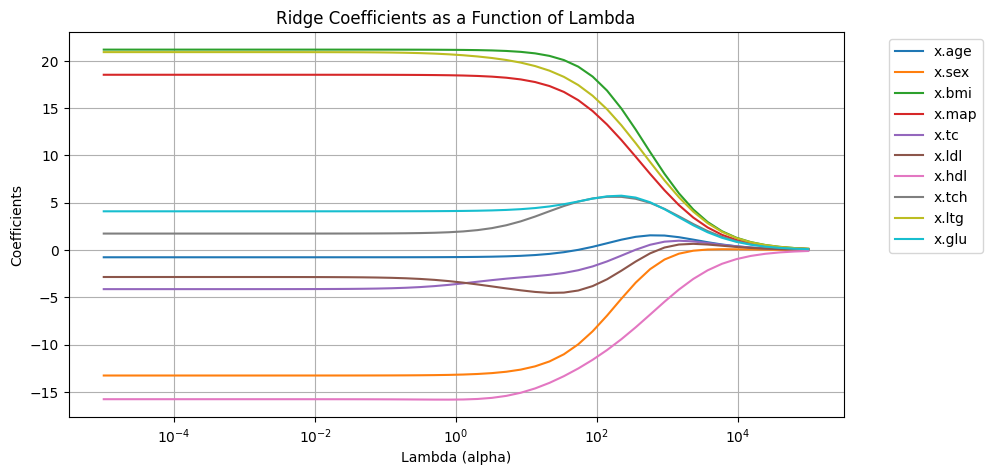

In [ ]:
# 리지 회귀 계수 저장
ridge_coefs = []
for alpha in ridge_params['alpha']:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train_scaled, y_train)
    ridge_coefs.append(ridge.coef_)


# 리지 회귀 계수 시각화
ridge_coefs = np.array(ridge_coefs)
plt.figure(figsize=(10, 5))
for i in range(ridge_coefs.shape[1]):
    plt.plot(ridge_params['alpha'], ridge_coefs[:, i],
             label = X_train.columns[i])
plt.xscale('log')
plt.xlabel('Lambda (alpha)')
plt.ylabel('Coefficients')
plt.title('Ridge Coefficients as a Function of Lambda')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()
plt.show()


In [ ]:
ridge = Ridge() # 릿지 함수 객체 생성
ridge_grid = GridSearchCV(ridge,
                          ridge_params, # 람다 후보
                          cv = 5, # cv > 1 이면, 여러번 반복해서 더 정확하게 추정 가능 보통 5, 10 사용
                          scoring = 'r2') # adjusted_r2
ridge_grid.fit(X_train_scaled, y_train)

ridge_grid

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': array([1.00000000e-05, 1.59985872e-05, 2.55954792e-05, 4.09491506e-05,
       6.55128557e-05, 1.04811313e-04, 1.67683294e-04, 2.68269580e-04,
       4.29193426e-04, 6.86648845e-04, 1.09854114e-03, 1.75751062e-03,
       2.81176870e-03, 4.49843267e-03, 7.19685673e-03, 1.15139540e-02,
       1.84206997e-02, 2.94705170e-02, 4.71486636e-02, 7....
       7.90604321e-01, 1.26485522e+00, 2.02358965e+00, 3.23745754e+00,
       5.17947468e+00, 8.28642773e+00, 1.32571137e+01, 2.12095089e+01,
       3.39322177e+01, 5.42867544e+01, 8.68511374e+01, 1.38949549e+02,
       2.22299648e+02, 3.55648031e+02, 5.68986603e+02, 9.10298178e+02,
       1.45634848e+03, 2.32995181e+03, 3.72759372e+03, 5.96362332e+03,
       9.54095476e+03, 1.52641797e+04, 2.44205309e+04, 3.90693994e+04,
       6.25055193e+04, 1.00000000e+05])},
             scoring='r2')

### 결과 확인

In [ ]:
## R2 값(scoring 값)
print("R2:", ridge_grid.best_score_) ## R2 값

## 최적의 람다(알파) 값
print("Optimal lambda: ", ridge_grid.best_params_)


R2: 0.4832163219705641
Optimal lambda:  {'alpha': np.float64(33.9322177189533)}


In [ ]:
## Optimal Ridge Model
best_ridge = ridge_grid.best_estimator_ ## 최적 모델 저장!
best_ridge


Ridge(alpha=np.float64(33.9322177189533))

In [ ]:
## 결과
y_pred_ridge = best_ridge.predict(X_train_scaled)
y_pred_ridge

array([140.87784503,  75.43083185, 140.73648762, 205.72520218,
       177.71386926,  95.44438497, 130.25814417, 177.31526666,
        74.64853521, 180.77871704, 135.28512255, 184.15903048,
       146.13062442, 128.71944617,  85.05306884, 243.3885089 ,
       283.16314744, 198.9725875 , 193.04914715, 151.22031537,
        39.19383433,  69.30947088, 222.50590276, 108.71978041,
       207.99802938, 164.20377873, 161.83512675, 140.21384834,
       168.0990073 , 190.60748321, 197.42948765, 148.92673971,
        85.66763401,  89.7319741 , 197.59910338, 173.35736092,
        59.62690887, 181.32986484, 121.48631108, 182.31951846,
       178.22421749, 188.72736921, 111.74877988, 177.33108446,
       175.63867665, 155.05512426,  73.67741138,  92.89636471,
       188.04934716,  97.55032147, 193.49603326, 105.50352879,
       279.85770552, 213.1230803 , 163.40615081, 183.29797798,
        91.67368081,  64.848711  , 176.8546209 , 156.32837784,
       181.07340633, 140.76972038, 187.16016014,  64.59

### Ridge 회귀 모델의 회귀 계수


In [ ]:
## Ridge 회귀 모델의 회귀 계수
ridge_coefs = pd.Series(best_ridge.coef_,
                        index = X_train.columns)
print("Ridge 회귀 모델의 회귀 계수:")
print(ridge_coefs)


Ridge 회귀 모델의 회귀 계수:
x.age    -0.228424
x.sex   -11.023387
x.bmi    20.089181
x.map    16.719114
x.tc     -2.423419
x.ldl    -4.502454
x.hdl   -13.338341
x.tch     4.653638
x.ltg    18.313320
x.glu     4.843075
dtype: float64


## Lasso

### 라쏘 회귀 모델의 최적 람다 결정


In [ ]:
## 라쏘 회귀 모델의 최적 람다 결정
lasso_params = {'alpha': np.logspace(-5, 5, 50)}
lasso_params

{'alpha': array([1.00000000e-05, 1.59985872e-05, 2.55954792e-05, 4.09491506e-05,
        6.55128557e-05, 1.04811313e-04, 1.67683294e-04, 2.68269580e-04,
        4.29193426e-04, 6.86648845e-04, 1.09854114e-03, 1.75751062e-03,
        2.81176870e-03, 4.49843267e-03, 7.19685673e-03, 1.15139540e-02,
        1.84206997e-02, 2.94705170e-02, 4.71486636e-02, 7.54312006e-02,
        1.20679264e-01, 1.93069773e-01, 3.08884360e-01, 4.94171336e-01,
        7.90604321e-01, 1.26485522e+00, 2.02358965e+00, 3.23745754e+00,
        5.17947468e+00, 8.28642773e+00, 1.32571137e+01, 2.12095089e+01,
        3.39322177e+01, 5.42867544e+01, 8.68511374e+01, 1.38949549e+02,
        2.22299648e+02, 3.55648031e+02, 5.68986603e+02, 9.10298178e+02,
        1.45634848e+03, 2.32995181e+03, 3.72759372e+03, 5.96362332e+03,
        9.54095476e+03, 1.52641797e+04, 2.44205309e+04, 3.90693994e+04,
        6.25055193e+04, 1.00000000e+05])}

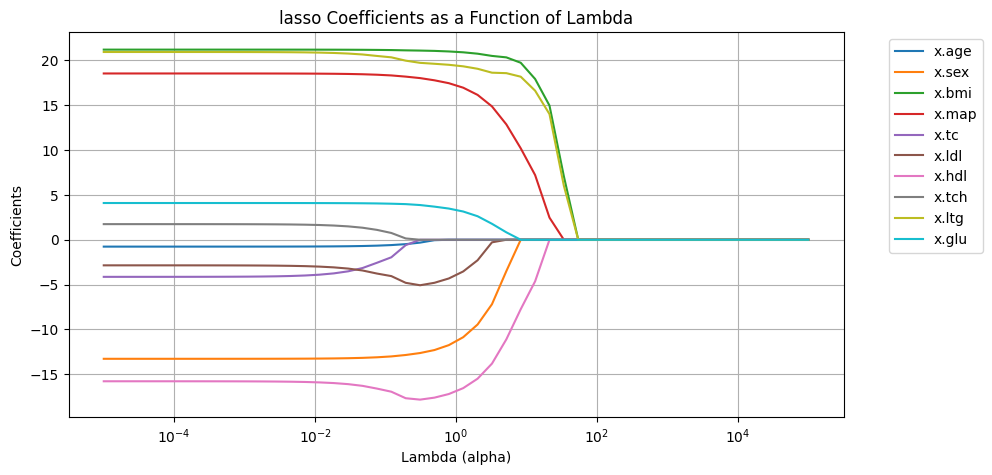

In [ ]:
# 라쏘 회귀 계수 저장
lasso_coefs = []
for alpha in lasso_params['alpha']:
    lasso = Lasso(alpha = alpha)
    lasso.fit(X_train_scaled, y_train)
    lasso_coefs.append(lasso.coef_)


# 라쏘 회귀 계수 시각화
lasso_coefs = np.array(lasso_coefs)
plt.figure(figsize=(10, 5))
for i in range(lasso_coefs.shape[1]):
    plt.plot(lasso_params['alpha'], lasso_coefs[:, i],
             label = X_train.columns[i])
plt.xscale('log')
plt.xlabel('Lambda (alpha)')
plt.ylabel('Coefficients')
plt.title('lasso Coefficients as a Function of Lambda')
plt.legend(bbox_to_anchor=(1.05, 1), loc= 'upper left')
plt.grid()
plt.show()


In [ ]:
lasso = Lasso() # 라쏘 함수 객체 생성
lasso_grid = GridSearchCV(lasso,
                          lasso_params, # 람다 후보
                          cv = 5, # cv > 1 이면, 여러번 반복해서 더 정확하게 추정 가능 보통 5, 10 사용
                          scoring = 'r2') # adjusted_r2
lasso_grid.fit(X_train_scaled, y_train)

lasso_grid

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.750e+04, tolerance: 1.477e+02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.458e+04, tolerance: 1.465e+02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.547e+04, tolerance: 1.398e

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': array([1.00000000e-05, 1.59985872e-05, 2.55954792e-05, 4.09491506e-05,
       6.55128557e-05, 1.04811313e-04, 1.67683294e-04, 2.68269580e-04,
       4.29193426e-04, 6.86648845e-04, 1.09854114e-03, 1.75751062e-03,
       2.81176870e-03, 4.49843267e-03, 7.19685673e-03, 1.15139540e-02,
       1.84206997e-02, 2.94705170e-02, 4.71486636e-02, 7....
       7.90604321e-01, 1.26485522e+00, 2.02358965e+00, 3.23745754e+00,
       5.17947468e+00, 8.28642773e+00, 1.32571137e+01, 2.12095089e+01,
       3.39322177e+01, 5.42867544e+01, 8.68511374e+01, 1.38949549e+02,
       2.22299648e+02, 3.55648031e+02, 5.68986603e+02, 9.10298178e+02,
       1.45634848e+03, 2.32995181e+03, 3.72759372e+03, 5.96362332e+03,
       9.54095476e+03, 1.52641797e+04, 2.44205309e+04, 3.90693994e+04,
       6.25055193e+04, 1.00000000e+05])},
             scoring='r2')

### 결과 확인

In [ ]:
## R2 값(scoring 값)
print("R2:", lasso_grid.best_score_) ## R2 값

## 최적의 람다(알파) 값
print("Optimal lambda: ", lasso_grid.best_params_)


R2: 0.4840738298825681
Optimal lambda:  {'alpha': np.float64(1.2648552168552958)}


In [ ]:
## Optimal lasso Model
best_lasso = lasso_grid.best_estimator_ ## 최적 모델을 저장
best_lasso


Lasso(alpha=np.float64(1.2648552168552958))

In [ ]:
## 결과
y_pred_lasso = best_lasso.predict(X_train_scaled)
y_pred_lasso

array([142.98922206,  75.0747698 , 142.57960985, 206.06847883,
       174.17747454,  99.90995591, 130.22022979, 179.87051443,
        73.53159415, 183.54443791, 134.68018761, 185.11821042,
       147.94997271, 127.86020449,  82.0945029 , 245.94097445,
       286.31382527, 199.56071963, 193.57680565, 153.8544388 ,
        33.77161522,  68.89674521, 219.46714573, 107.00715378,
       207.58776691, 165.25083658, 168.32326786, 141.64328429,
       169.76053879, 194.87365238, 194.53372249, 149.70054399,
        81.74631808,  86.75128456, 205.403714  , 174.11959638,
        55.6115999 , 188.06252788, 120.20151518, 181.86758283,
       183.08070981, 191.95894763, 108.02420969, 179.02569852,
       171.72332362, 154.34833935,  74.87371682,  97.16700897,
       185.66950703,  97.17051662, 192.76202319, 104.1765265 ,
       281.72146132, 214.37517957, 165.98688277, 184.00431923,
        89.46709502,  62.53332026, 178.74524141, 156.16451059,
       184.03298744, 141.88512804, 187.23080846,  61.99

### lasso 회귀 모델의 회귀 계수

In [ ]:
## Lasso 회귀 모델의 회귀 계수
lasso_coefs = pd.Series(best_lasso.coef_,
                        index = X_train.columns)
print("Lasso 회귀 모델의 회귀 계수:")
print(lasso_coefs)

Lasso 회귀 모델의 회귀 계수:
x.age    -0.000000
x.sex   -10.860633
x.bmi    20.892942
x.map    16.948884
x.tc     -0.000000
x.ldl    -3.533698
x.hdl   -16.537870
x.tch     0.000000
x.ltg    19.330397
x.glu     3.147304
dtype: float64


In [ ]:
## Lasso 회귀 모델에서 선택된 변수 (계수가 0이 아닌 변수들)
sel_features_lasso = lasso_coefs[lasso_coefs != 0].index.tolist()
print("Lasso 회귀 모델에서 선택된 변수들:")
print(sel_features_lasso)

Lasso 회귀 모델에서 선택된 변수들:
['x.sex', 'x.bmi', 'x.map', 'x.ldl', 'x.hdl', 'x.ltg', 'x.glu']


## 비교

In [ ]:
rd2 = pd.read_csv('diabetes_testR.csv')
rd2

,x.age,x.sex,x.bmi,x.map,x.tc,x.ldl,x.hdl,x.tch,x.ltg,x.glu,y
0,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75
1,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141
2,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206
3,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135
4,0.027178,0.050680,0.017506,-0.033214,-0.007073,0.045972,-0.065491,0.071210,-0.096433,-0.059067,69
...,...,...,...,...,...,...,...,...,...,...,...
128,-0.027310,-0.044642,0.080019,0.098763,-0.002945,0.018101,-0.017629,0.003312,-0.029528,0.036201,257
129,-0.052738,-0.044642,0.071397,-0.074528,-0.015328,-0.001314,0.004460,-0.021412,-0.046879,0.003064,55
130,0.016281,-0.044642,0.001339,0.008101,0.005311,0.010899,0.030232,-0.039493,-0.045421,0.032059,49
131,-0.012780,-0.044642,-0.023451,-0.040099,-0.016704,0.004636,-0.017629,-0.002592,-0.038459,-0.038357,64


### 표준화 동일하게 적용!!


In [ ]:
test = rd2
X_test = test.drop(columns=['y'])
y_test = test['y']
X_test_scaled = scaler.transform(X_test) # 새로운 데이터가 들어오면 동일하게 적용!!!

### 새로운 데이터에 모델 적용


In [ ]:
## 새로운 데이터에 모델 적용
y_pred_ridge = best_ridge.predict(X_test_scaled)
y_pred_lasso = best_lasso.predict(X_test_scaled)

y_pred_raw = model_raw.predict(X_test_scaled)


In [ ]:
## 기본 모델 평가
mse_raw, mae_raw, r2_raw, mape_raw = evaluate_model(y_test, y_pred_raw)
print(f"Raw Regression - MSE: {mse_raw}, MAE: {mae_raw}, R2: {r2_raw}, MAPE: {mape_raw}")

## 릿지 모델 평가
mse_ridge, mae_ridge, r2_ridge, mape_ridge = evaluate_model(y_test, y_pred_ridge)
print(f"Best Ridge Alpha: {best_ridge.alpha}")
print(f"Ridge Regression - MSE: {mse_ridge}, MAE: {mae_ridge}, R2: {r2_ridge}, MAPE: {mape_ridge}")

## 라쏘 모델 평가
mse_lasso, mae_lasso, r2_lasso, mape_lasso = evaluate_model(y_test, y_pred_lasso)
print(f"Best Lasso Alpha: {best_lasso.alpha}")
print(f"Lasso Regression - MSE: {mse_lasso}, MAE: {mae_lasso}, R2: {r2_lasso}, MAPE: {mape_lasso}")

Raw Regression - MSE: 3259.2305185669384, MAE: 47.568179576787706, R2: 0.47440513938546736, MAPE: 42.03874166258878
Best Ridge Alpha: 33.9322177189533
Ridge Regression - MSE: 3244.0407433076734, MAE: 47.44090498298515, R2: 0.4768546954278149, MAPE: 41.8453492926525
Best Lasso Alpha: 1.2648552168552958
Lasso Regression - MSE: 3241.066542555847, MAE: 47.36937415734107, R2: 0.47733432539589804, MAPE: 41.870107141486926


In [ ]:
print('raw 변수:', X_train.columns.tolist())
print("raw 변수 값:", model_raw.coef_.tolist())

print('Ridge 변수:', X_train.columns.tolist())
print("Ridge 변수 값:", best_ridge.coef_.tolist())

print('lasso 변수:', sel_features_lasso)
non_zero_coefs = [coef for coef in best_lasso.coef_.tolist() if coef != 0]
print("lasso 변수 값:", non_zero_coefs)




raw 변수: ['x.age', 'x.sex', 'x.bmi', 'x.map', 'x.tc', 'x.ldl', 'x.hdl', 'x.tch', 'x.ltg', 'x.glu']
raw 변수 값: [-0.7653911869124843, -13.269129308790536, 21.192241952377408, 18.534101791249345, -4.134863912248502, -2.85208066345134, -15.773888197716547, 1.7409642538817225, 20.928113485027158, 4.094536119616751]
Ridge 변수: ['x.age', 'x.sex', 'x.bmi', 'x.map', 'x.tc', 'x.ldl', 'x.hdl', 'x.tch', 'x.ltg', 'x.glu']
Ridge 변수 값: [-0.22842371049240628, -11.023387106990334, 20.089180889283213, 16.719114345084904, -2.423418928123432, -4.502453938031789, -13.338341209303934, 4.653637822504045, 18.31332015291226, 4.843075337973446]
lasso 변수: ['x.sex', 'x.bmi', 'x.map', 'x.ldl', 'x.hdl', 'x.ltg', 'x.glu']
lasso 변수 값: [-10.860633097054405, 20.892942324009713, 16.948884477724594, -3.533698041937663, -16.537869689870714, 19.330397101493332, 3.1473040591254766]


### 릿지, 라쏘 등 회귀모형 결과 사용 방법

- LASSO와 Ridge 회귀의 결과에 대해 일반적으로 추가적인 통계적 유의성 검증을 하지 않음
  - Ridge 및 LASSO 회귀는 통계적 유의성을 평가하는 p-value를 직접 제공하지 않음
  - pvalue는 주로 OLS 회귀 분석에서 각 독립 변수의 회귀 계수가 통계적으로 유의미한지 평가하기 위해 사용됨
  - LASSO와 Ridge는 주로 예측 성능 향상과 과적합 방지를 목적하나, 전통적인 통계적 유의성 검증은 변수의 개별적 영향력을 평가하는 데 중점
  - 정규화(Regularization): LASSO와 Ridge는 계수를 축소하거나 0으로 만들어 자체적으로 변수 선택 또는 중요도 평가를 수행
  - 교차 검증(cv): 일반적으로 교차 검증을 통해 모델의 성능을 평가하고 최적의 정규화 람다 값을 선택  


- 회귀 분석에서 유의미하지 않은 변수를 포함할지 여부를 결정할때..
  - 도메인 지식: 회귀 분석 결과는 유의미하지 않지만 도메인 지식에 따라 중요한 변수라면 포함시켜도 무방
  - 모델 목적: 예측 정확도가 목표라면 제거, 변수 해석이 중요하다면 포함
  - 다중공선성: 변수들 간 상관관계가 높아 모델 안정성을 해칠 경우 제외
  - 모델 복잡성: 불필요한 변수는 모델 복잡성을 높이고 과적합 위험 증가시킴.
  - 검증 및 실험: 교차 검증 등을 통해 유의미하지 않은 변수를 포함한 모델과 제외한 모델의 성능 비교 가능

## 참고

In [ ]:
## 특정 람다 값으로 리지 회귀 모델 학습
ridge_alpha = 1
ridge = Ridge(alpha = ridge_alpha)
ridge.fit(X_train_scaled, y_train)
y_pred_ridge = ridge.predict(X_test_scaled)




In [ ]:
## 특정 람다 값으로 라쏘 회귀 모델 학습
lasso_alpha = 10

lasso2 = Lasso(alpha = lasso_alpha)
lasso2.fit(X_train_scaled, y_train)
y_pred_lasso2 = lasso2.predict(X_test_scaled)



In [ ]:
## Lasso 회귀 모델의 회귀 계수
lasso_coefs2 = pd.Series(lasso2.coef_, index = X_train.columns)
print("Lasso 회귀 모델의 회귀 계수:")
print(lasso_coefs2)

Lasso 회귀 모델의 회귀 계수:
x.age     0.000000
x.sex    -0.000000
x.bmi    19.105618
x.map     9.165390
x.tc     -0.000000
x.ldl    -0.000000
x.hdl    -6.669931
x.tch     0.000000
x.ltg    17.636990
x.glu     0.000000
dtype: float64
